                                          Hotel booking demand
 Type of hotels is a key important information in the reservation process, according to this information the hotels guest can filter the desired type of hotel to save the time of reservation process. 
Our Goal of this dataset is to analyze the ideal hotel for families or adults' accommodation to help the guest to explore the hotels in an effective manner, so in this project we will consider classification of the hotels.



source of the dataset: (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).


General information about the dataset:




  1-Number of variables :32

2-Number of observations:119390

In [3]:

import pandas as pd

In [4]:
hotel_data =pd.read_csv("hotel_bookings.csv")

In [5]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [14]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
hotel_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

A summary of the dataset including samples of raw dataset, graphs and tables show
variables distribution, missing values and statistical summaries (mean and variance).

In [16]:
# raw dataset
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


1. What type of hotel has more bookings?   Pie chart

In [17]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x19ea0d70d60>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

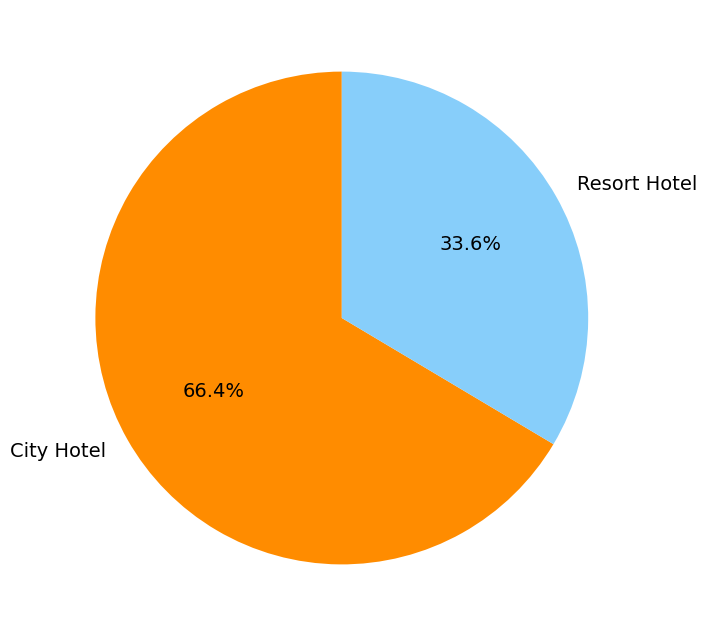

In [18]:

# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# assigning labels and converting them to list 
labels = hotel_data['hotel'].value_counts().index.tolist()

# assigning magnitude and converting to list
sizes = hotel_data['hotel'].value_counts().tolist()

# assigning pie chart color
colors = ["darkorange","lightskyblue"]

# creating pie chart
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})



2. Which are the most busy months?

Text(0, 0.5, 'Count')

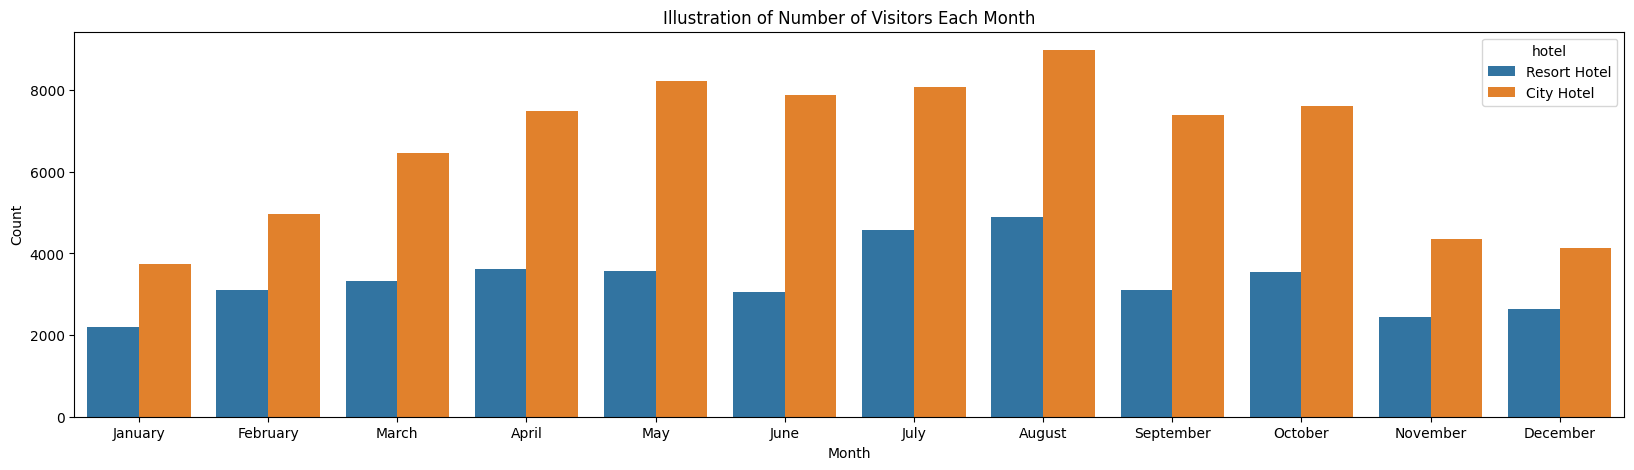

In [19]:
# We can simply use a countplot as we sre visualising categorical data
plt.figure(figsize=(20,5))

# data we will use in a list
l1 = ['hotel','arrival_date_month']

# plotting
sns.countplot(data = hotel_data[l1],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Illustration of Number of Visitors Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

3. Cancellation rates in the two types of hotels.

In [20]:
# Let's look into how much of bookings were cancelled in each type of hotel
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = hotel_data[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'Cancelled'].groupby(['hotel']).size().reset_index(name = 'count')
canceled_hotel
#sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing cancellation rates in city and resort hotel')

,hotel,count


4. Types of visitors? (No. of adults, children, babies)

Text(0.5, 1.0, 'Illustration of number of adults visiting each hotel')

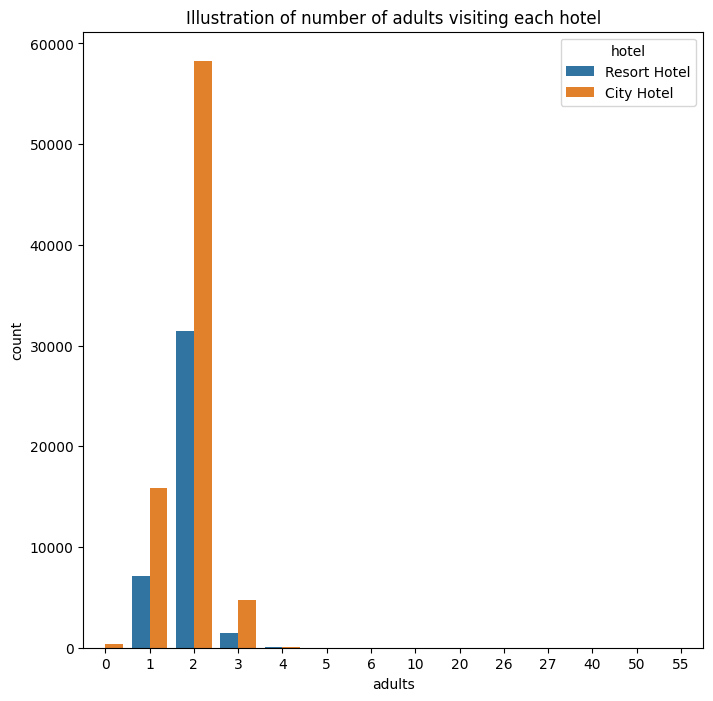

In [21]:

sns.countplot(data=hotel_data,x='adults',hue='hotel').set_title("Illustration of number of adults visiting each hotel")

Text(0.5, 1.0, 'Illustration of number of children')

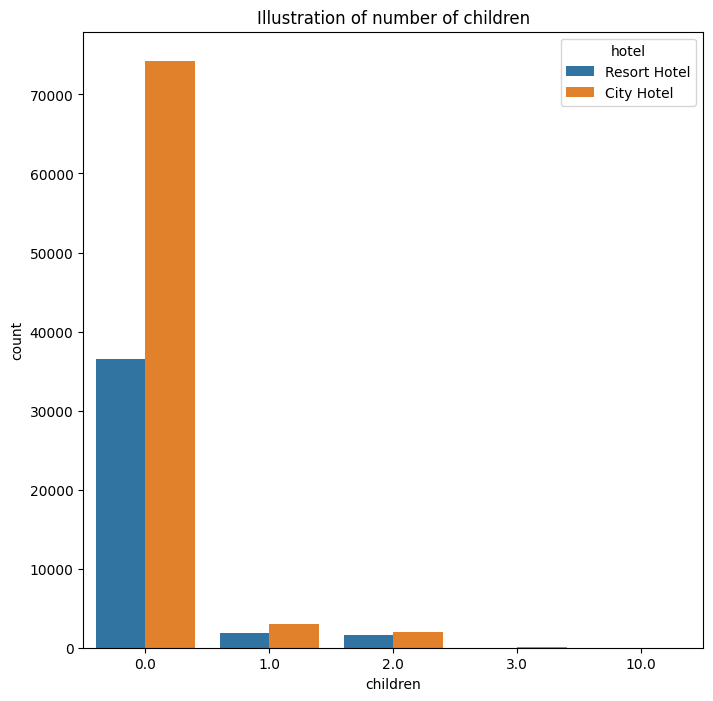

In [22]:
# We'll do the same for children and babies as adults
sns.countplot(data=hotel_data,x='children',hue='hotel').set_title("Illustration of number of children")

Text(0.5, 1.0, 'Illustration of number of babies')

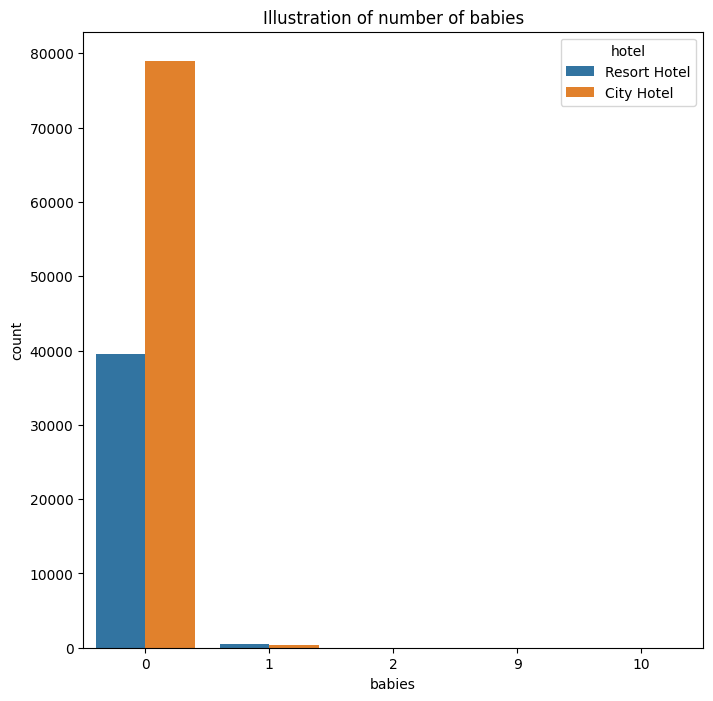

In [23]:
sns.countplot(data=hotel_data,x='babies',hue='hotel').set_title("Illustration of number of babies")

5. Repeated guests.

Text(0.5, 1.0, 'Illustration of number of repeated guests')

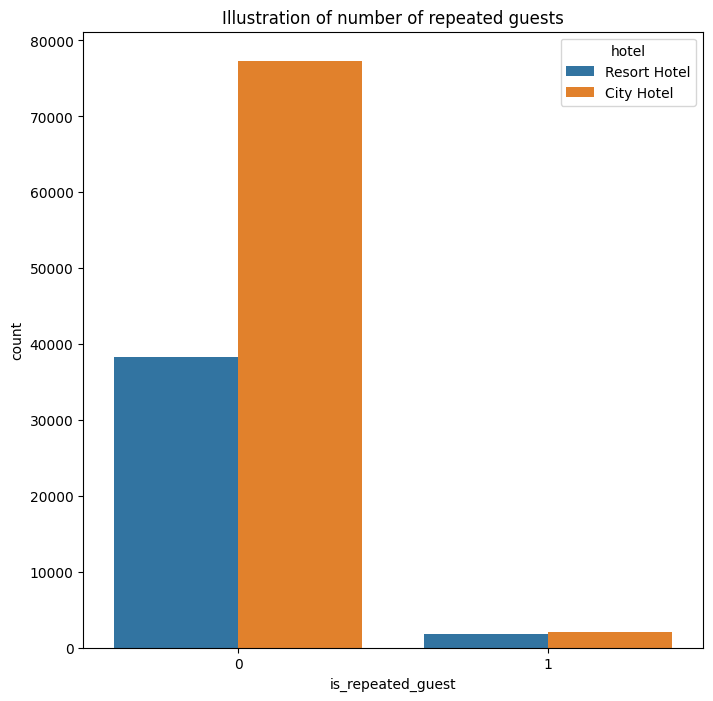

In [24]:
# We will again use a countplot as we will only see how many guests visited back in each hotel.
sns.countplot(data=hotel_data,x="is_repeated_guest",hue="hotel").set_title("Illustration of number of repeated guests")

<h3> missing values</h3>

In [6]:
import numpy as np
np.sum(hotel_data.isnull())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<h3> statistical summaries </h3>

In [7]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h2>Data Transformation
</h2>  <h3>normalization:</h3>

because the "adr" attribute has a large scale of data, we will normalization the data in order to scale the data values in a specified range ( 0.0 to 1.0) 

In [10]:
hotel_data['adr'].min


<bound method NDFrame._add_numeric_operations.<locals>.min of 0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64>

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
name = ['adr']
data_to_normalization = hotel_data[name].values
v_scaled = min_max_scaler.fit_transform(data_to_normalization)
temp = pd.DataFrame(v_scaled,columns=name,index= hotel_data.index)
hotel_data[name]= temp

In [ ]:
hotel_data['adr'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0         0.001180
1         0.001180
2         0.015053
3         0.015053
4         0.019307
            ...   
119385    0.018963
119386    0.042877
119387    0.030351
119388    0.020491
119389    0.029147
Name: adr, Length: 119390, dtype: float64>

<h3>discretization:</h3>

we will replace the raw values of total_of_special_requests attribute by 3 levels.
<br> 
1- no special requests, for zero requests.<br>
2- few special requests, from 1 to 3 requests.<br>
3- many special requests, from 4 and more requests.<br> 

In [13]:
hotel_data['total_of_special_requests'] = pd.cut(x = hotel_data['total_of_special_requests'], bins = [0,1,4,8], right = False, labels=[1,2,3])

In [14]:
hotel_data['total_of_special_requests'].head

<bound method NDFrame.head of 0         1
1         1
2         1
3         1
4         2
         ..
119385    1
119386    2
119387    3
119388    1
119389    2
Name: total_of_special_requests, Length: 119390, dtype: category
Categories (3, int64): [1 < 2 < 3]>

<h2>Data cleaning</h2>
1) Finding the number of missing values<br>
Checking how many missing values each column contains


In [ ]:
import numpy as np
np.sum(hotel_data.isnull())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

2)To find the indexes of the missing value

Eg. Finding 4 missing value indexes of children column

In [ ]:
hotel_data.children[hotel_data.children != hotel_data.children].index.values

array([40600, 40667, 40679, 41160], dtype=int64)

3) Removing the unwanted columns<br>
Usually if more than 70% of values in a column are missing and there is no way to fill in the missing values, then the column can be dropped completely from the dataset. 70% of 110390 is 83573


In [ ]:
for col in hotel_data.columns:
    if np.sum(hotel_data[col].isnull())>(hotel_data.shape[0] * 0.7):
        hotel_data.drop(columns=col, inplace=True, axis=1)
print(hotel_data.shape)

(119390, 30)


The "arrival_date_week_number" column is of no use as we already have 3 columns of year, month and day giving us the date of arrival.Also as we have created a new column showing the date, we no more need the 3 seperate columns. Hence lets remove these columns

In [ ]:
hotel_data.drop(columns=["arrival_date_week_number", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"],
           inplace=True, axis=1)

In [ ]:
hotel_data.shape


(119390, 26)

4)Removing the unwanted row

we will remove all rows having a missing value in the agent column

In [ ]:
hotel_data.dropna(subset=["agent"], inplace=True)
hotel_data.shape

(103050, 26)

5)Filling the missing values of columns

First let us fill the children column Here we have used mean as a value to be replaced with missing values As mean can be a float, we have taken the lowest nearest integer using the floor method

In [ ]:
hotel_data["children"].fillna(value = hotel_data["children"].mean(), inplace=True)
hotel_data["children"] = hotel_data["children"].apply(np.floor)
print(f"Total missing values in children column after filling = {np.sum(hotel_data.children.isnull())}")

Total missing values in children column after filling = 0


Now, we will fill country 

In [ ]:
arr=[ "country"]
print("No of missing values are")
for x in arr:
    hotel_data[x].fillna(method="bfill", inplace=True)
    print(f"{x}: {np.sum(hotel_data[x].isnull())}")

No of missing values are
country: 0


Checking if the columns contain any null value

In [ ]:
np.sum(hotel_data.isnull())

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
reservation_status                0
reservation_status_date           0
dtype: int64